# Mini-projet IA (classification) :  
## Risques Cardiovasculaires

### 1. Data understanding (compréhension des données) : 

##### Chargement et affichage des données

In [37]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [38]:
#Chargement des données
dataset = pd.read_csv("Cardiovascular_Diseases.csv" ,sep=',' ,low_memory=False)
target_column = "Heart_Disease"

#Affichage des données
print(dataset.head(10))

  General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   
2      Very Good     Within the past year      Yes            No          No   
3           Poor     Within the past year      Yes           Yes          No   
4           Good     Within the past year       No            No          No   
5           Good     Within the past year       No            No          No   
6           Fair     Within the past year      Yes           Yes          No   
7           Good     Within the past year      Yes            No          No   
8           Fair     Within the past year       No            No          No   
9           Fair     Within the past year       No            No          No   

  Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  \
0           No         No       No       Yes  Fema

##### Description

In [4]:
#volume : nombre total d'instances
#dimension : nombre total des attributs

print("(volume , dimension) =" ,dataset.shape)

(volume , dimension) = (308854, 19)


In [5]:
#Informations sur les types  et le  codage de données 
dataset.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                      object
BMI                              object
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

In [6]:
#Informations sur le dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       299312 non-null  object 
 2   Exercise                      299312 non-null  object 
 3   Heart_Disease                 299312 non-null  object 
 4   Skin_Cancer                   299312 non-null  object 
 5   Other_Cancer                  299312 non-null  object 
 6   Depression                    299312 non-null  object 
 7   Diabetes                      299312 non-null  object 
 8   Arthritis                     299312 non-null  object 
 9   Sex                           299312 non-null  object 
 10  Age_Category                  299312 non-null  object 
 11  Height_(cm)                   299287 non-null  float64
 12  Weight_(kg)                   299311 non-nul

<div class="alert alert-info">
<h3>Note</h3>
<p>
    BMI et le Weight_(kg) sont considérés des objets , donc il faut les transformer en valeur numérique.
</p>
</div>

In [7]:
#Statistiques descriptives
print(dataset.describe(include='all'))

       General_Health               Checkup Exercise Heart_Disease  \
count          308854                299312   299312        299312   
unique           9547                     5        2             2   
top         Very Good  Within the past year      Yes            No   
freq           107449                231520   232412        275231   
mean              NaN                   NaN      NaN           NaN   
std               NaN                   NaN      NaN           NaN   
min               NaN                   NaN      NaN           NaN   
25%               NaN                   NaN      NaN           NaN   
50%               NaN                   NaN      NaN           NaN   
75%               NaN                   NaN      NaN           NaN   
max               NaN                   NaN      NaN           NaN   

       Skin_Cancer Other_Cancer Depression Diabetes Arthritis     Sex  \
count       299312       299312     299312   299312    299312  299312   
unique       

<div class="alert alert-warning">
<h3>Note</h3>
<p>
  Les attributs numériques tels que la taille, le poids et l'indice de masse corporelle (BMI) présentent une variabilité significative, avec des écarts-types élevés indiquant une dispersion importante des données autour de la moyenne. Par exemple, la taille moyenne est de 170.72 cm avec un écart-type de 10.65 cm. Les attributs catégoriels tels que l'état de santé général, la pratique d'exercices physiques et les antécédents médicaux montrent une diversité de réponses, avec des valeurs uniques et des fréquences variables. Par exemple, la majorité des individus déclarent avoir une santé générale "Très bonne", tandis que la pratique d'exercices est majoritairement signalée comme "Oui". Ces statistiques offrent un aperçu précieux de la distribution et de la variabilité des données, ce qui peut être utile pour identifier les tendances et les valeurs aberrantes potentielles dans notre ensemble de données sur les maladies cardiovasculaires.  
</p>
</div>

In [8]:
print(dataset.columns)

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')


##### visualisation


Heart_Disease
No     275231
Yes     24081
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution de Heart_Disease')

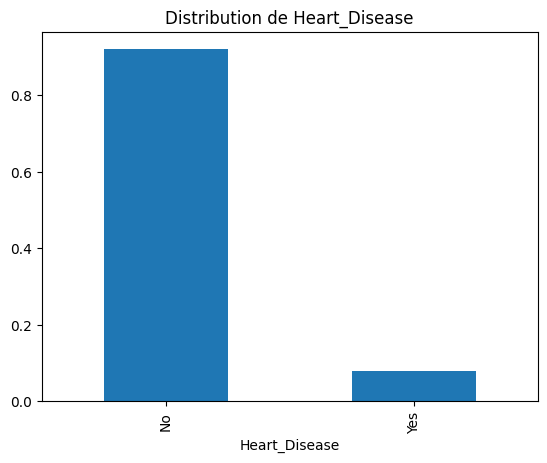

In [9]:
print(dataset[target_column].value_counts())
dataset.Heart_Disease.value_counts(normalize=True).plot(kind='bar', alpha=1)
plt.title('Distribution de Heart_Disease')

<div class="alert alert-warning">
<h3>Note</h3>
<p>
Le graphique montre clairement un déséquilibre significatif dans les données concernant les maladies cardiaques. La catégorie des non malades est nettement plus représentée que celle des malades. Il est important de prendre en compte ce déséquilibre lors de l'analyse des résultats et des performances des modèles prédictifs, car cela peut avoir un impact sur la capacité du modèle à généraliser correctement.  
</p>
</div>

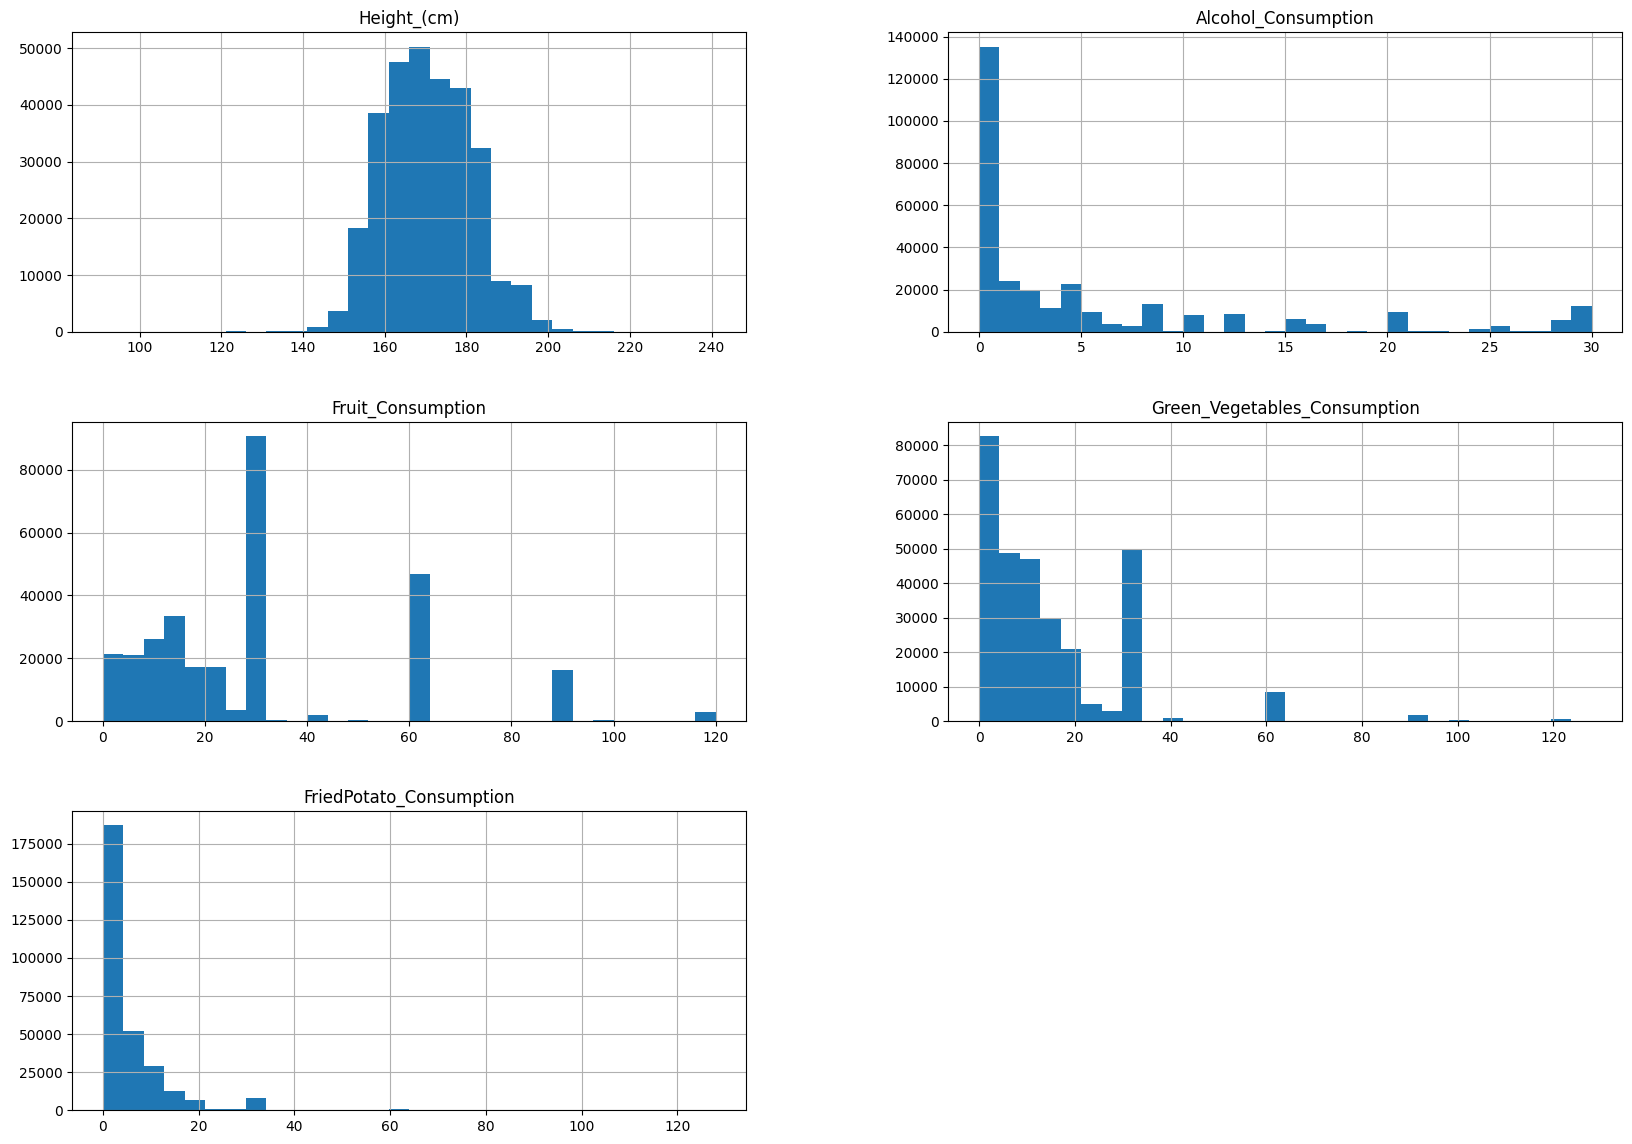

In [10]:
#Répartition des variables dans le dataset
_ = dataset.hist(figsize=(20, 14),bins=30 )

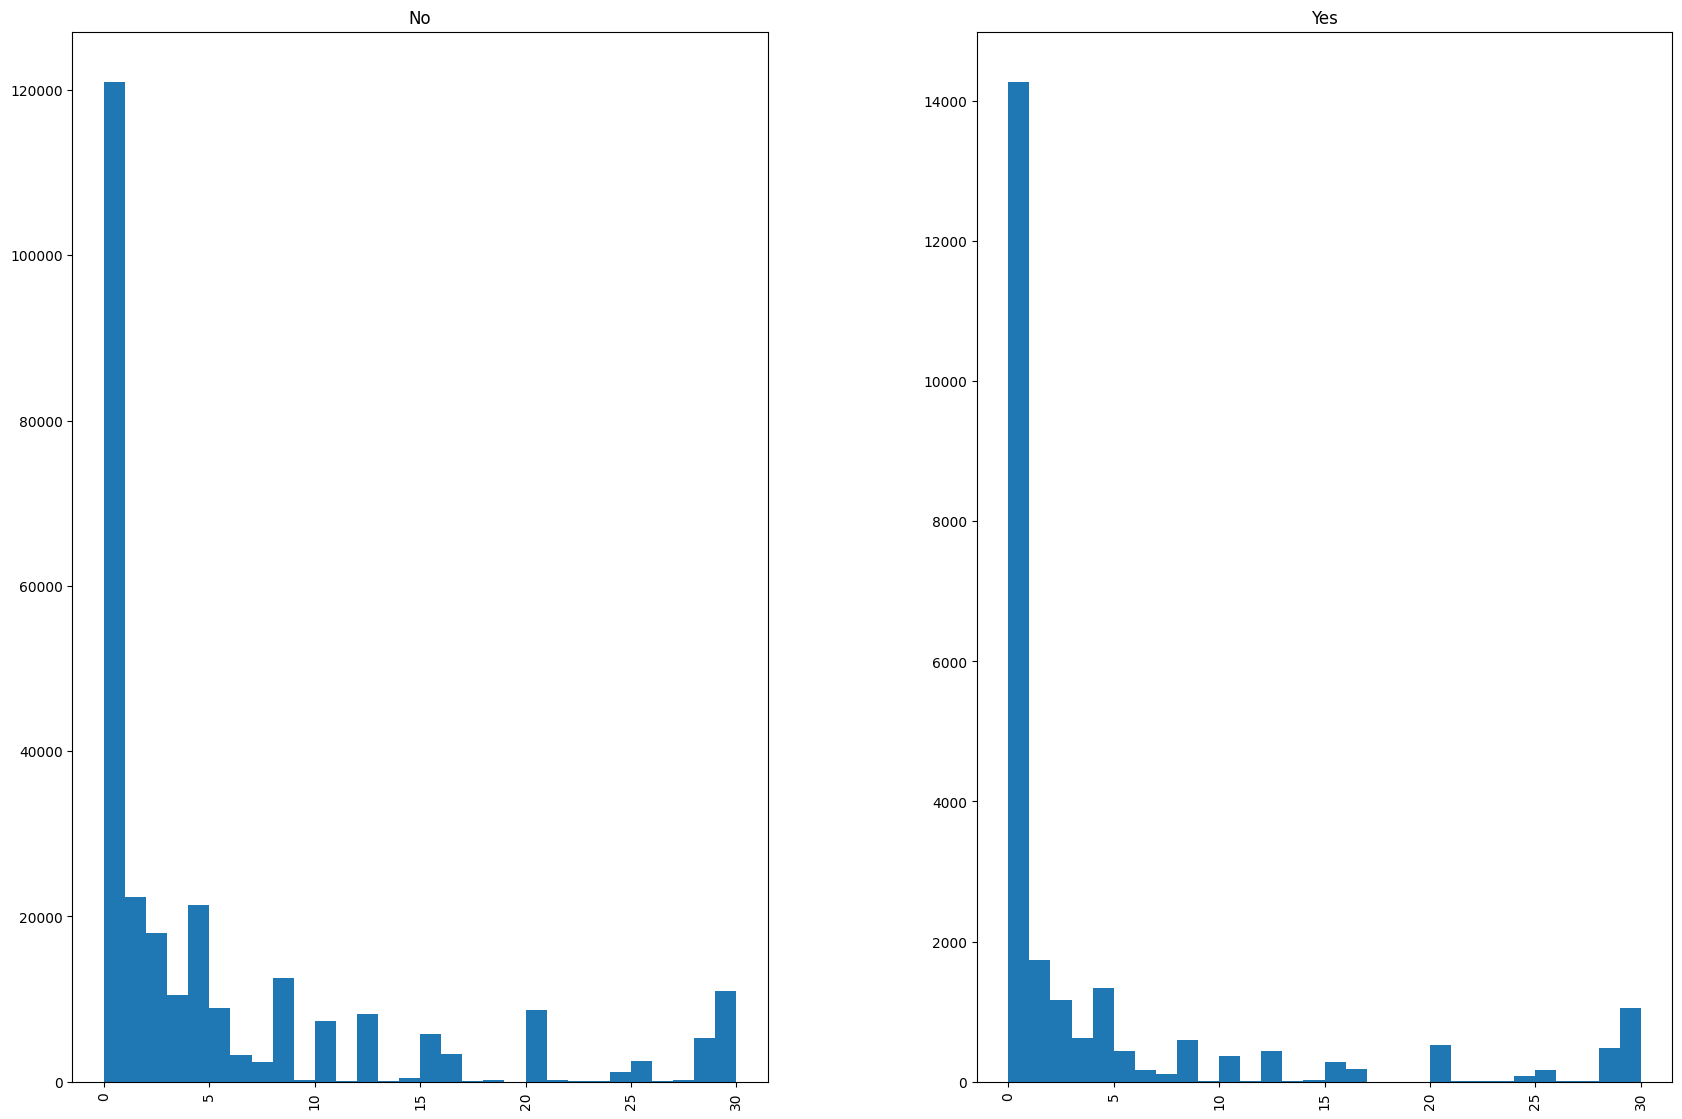

In [3]:
#alcohol consumption by heart disease
_ = dataset.hist(figsize=(20, 14),bins=30 ,column='Alcohol_Consumption', by='Heart_Disease')

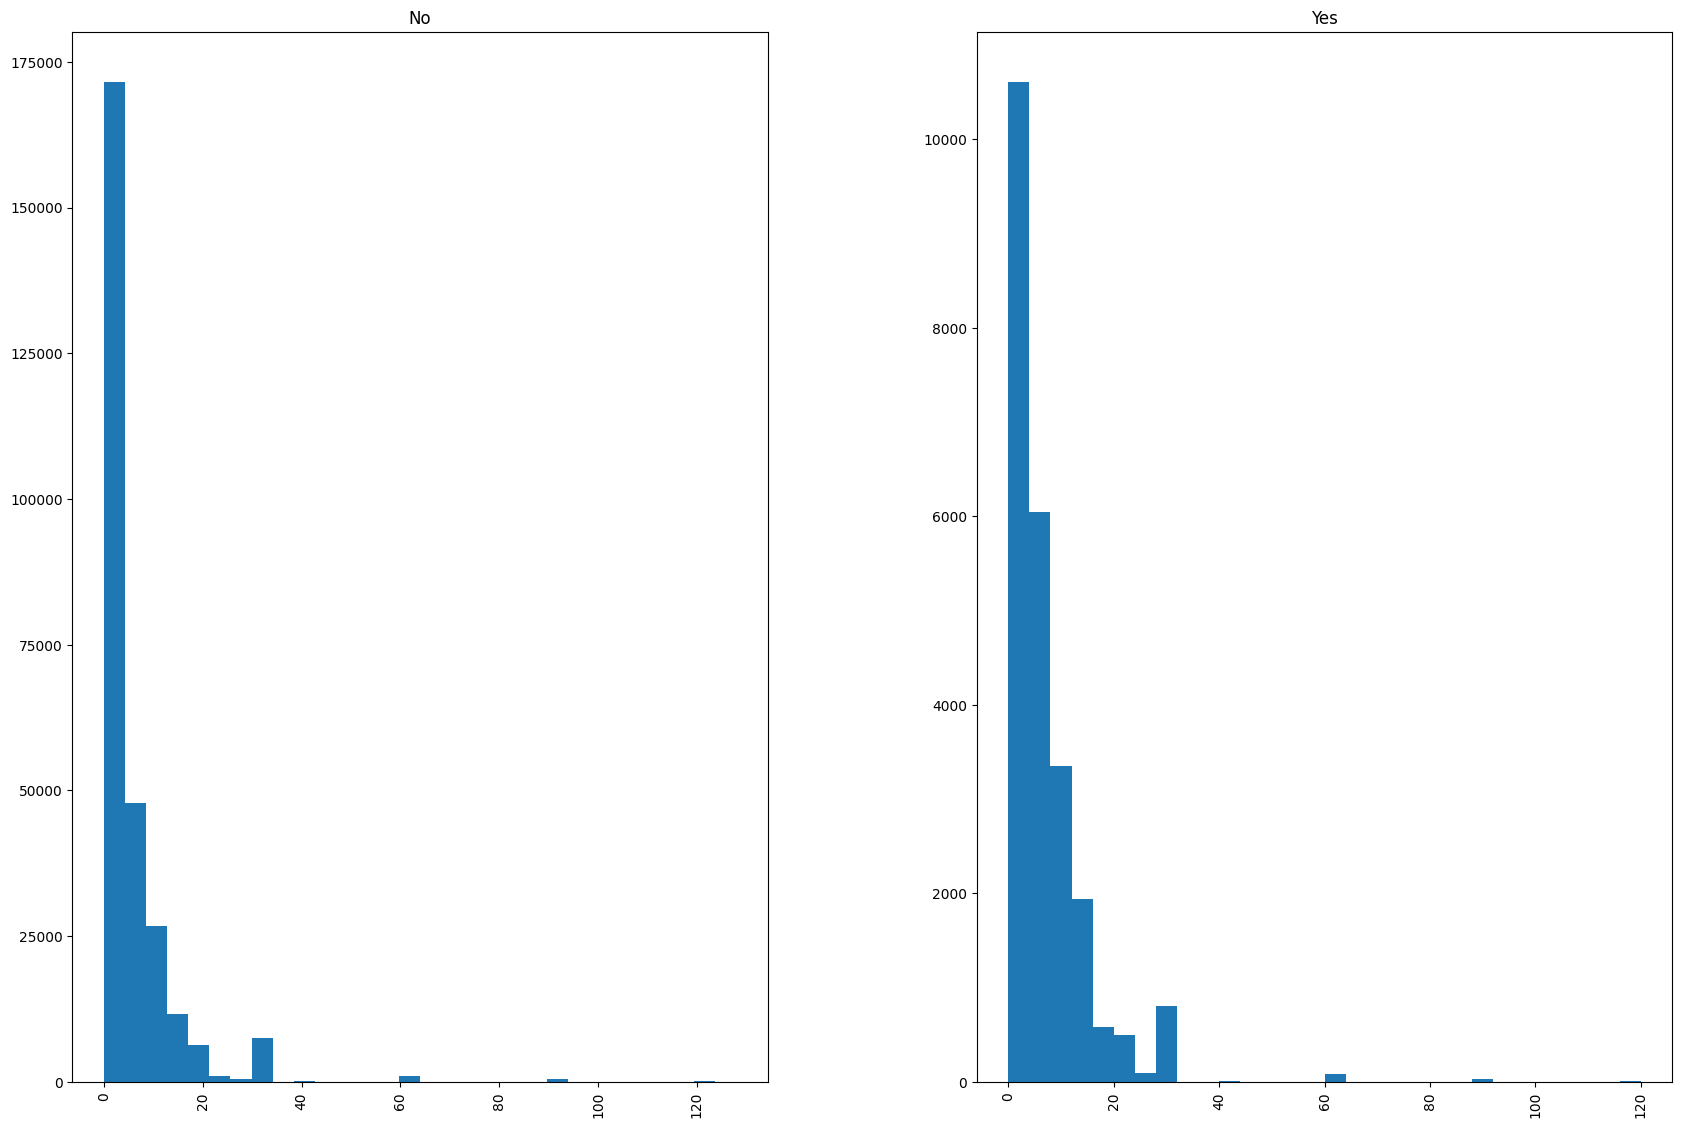

In [4]:
#FriedPotato Consumption by Heart_Disease
_ = dataset.hist(figsize=(20, 14),bins=30 ,column='FriedPotato_Consumption', by='Heart_Disease')

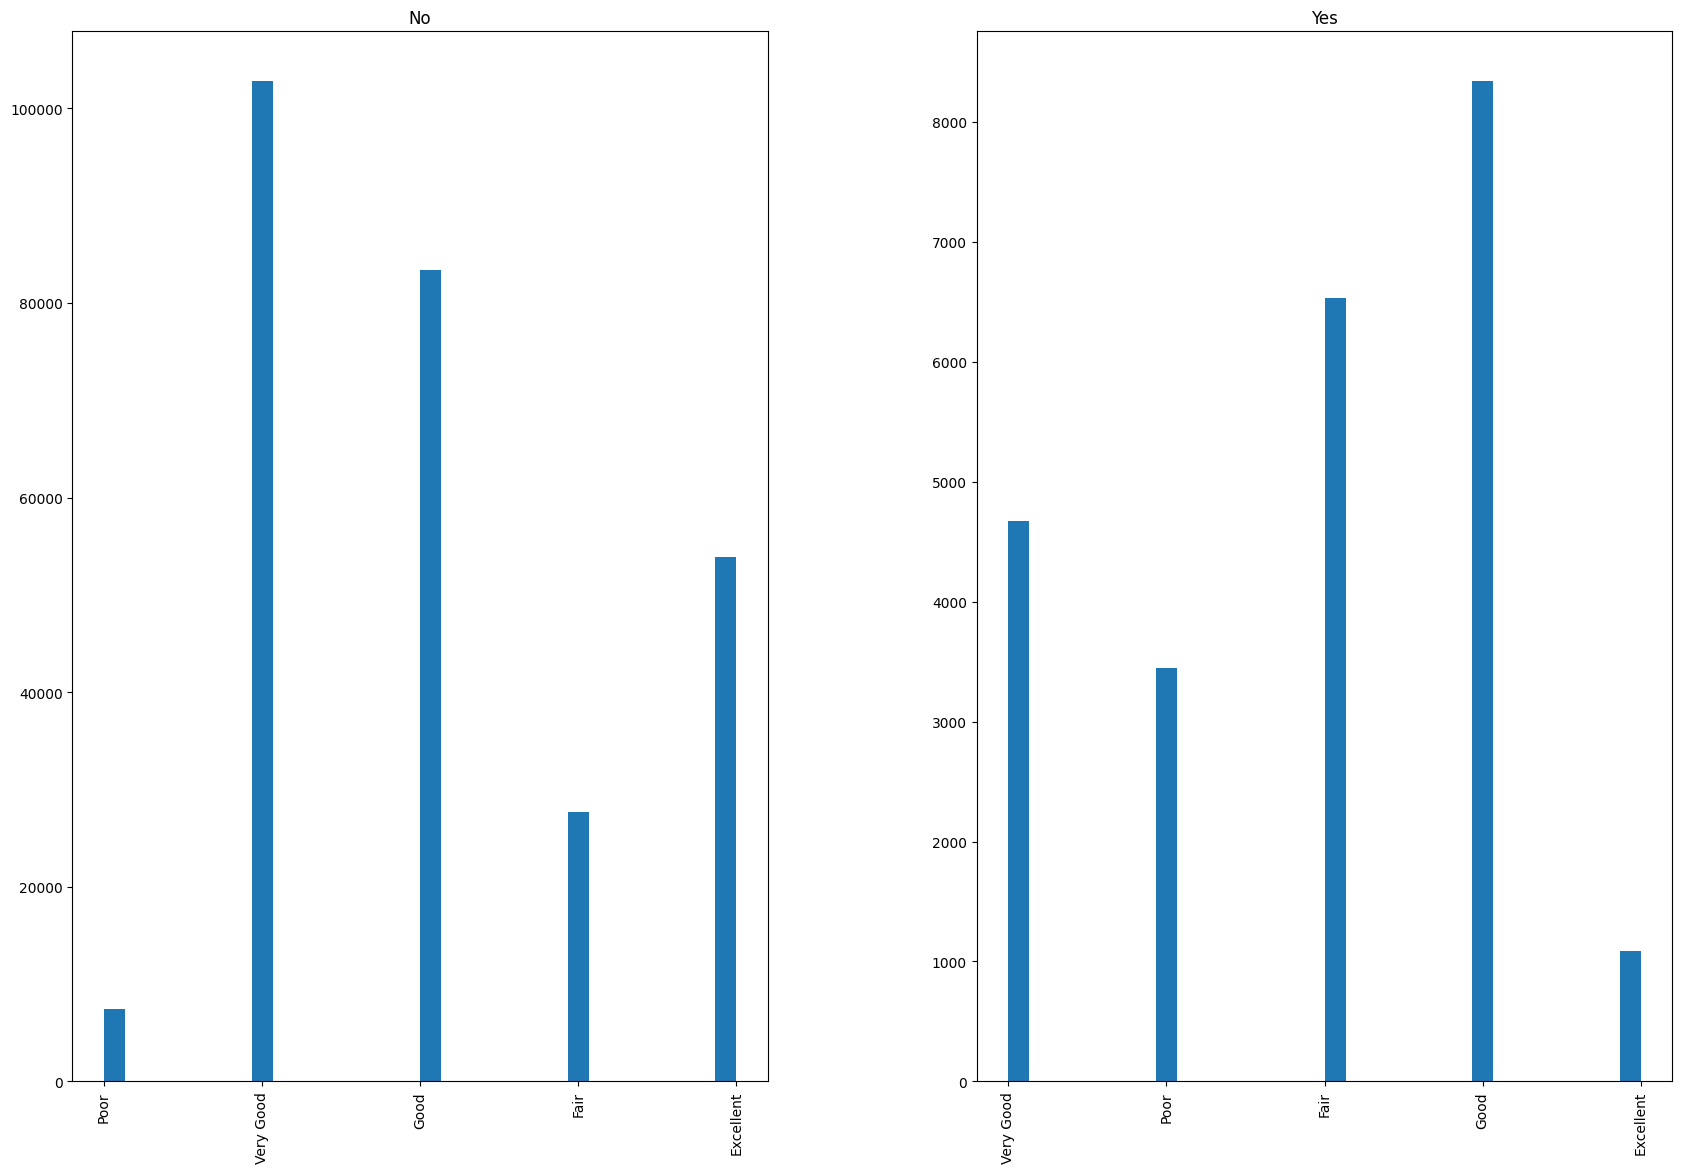

In [13]:
#Répartition de l'état de santé général en fonction des maladies cardiaques
_ = dataset.hist(figsize=(20, 14),bins=30 ,column='General_Health', by='Heart_Disease')

In [14]:
#Identification des colonnes de type objet dans le dataset
columns = dataset.columns
object_columns = dataset.drop(dataset.columns[3], axis=1).select_dtypes(include='object').columns.tolist()
print(object_columns)

['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Weight_(kg)', 'BMI', 'Smoking_History']


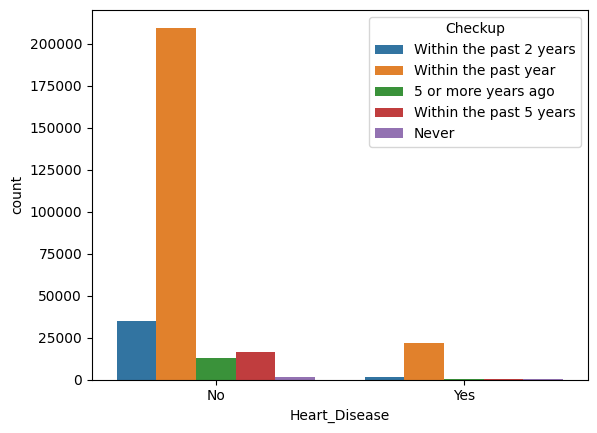

In [5]:
#Checkups by heart disease
sns.countplot(x =target_column , hue = "Checkup", data = dataset)
plt.show()

<div class="alert alert-info">
<h3>Intérpretation</h3>
<p>
  Malgré le déséquilibre de l'échantillon, avec un nombre beaucoup plus élevé de personnes non malades, on observe que la majorité des personnes, qu'elles soient malades ou non, font de l'exercice.

</p>
</div>

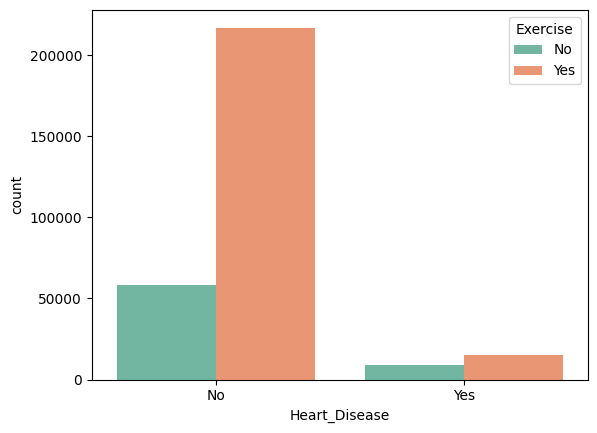

In [16]:
#la répartition des personnes selon leur pratique d'exercice
sns.countplot(x =target_column , hue = 'Exercise', data = dataset ,palette = "Set2")
plt.show()

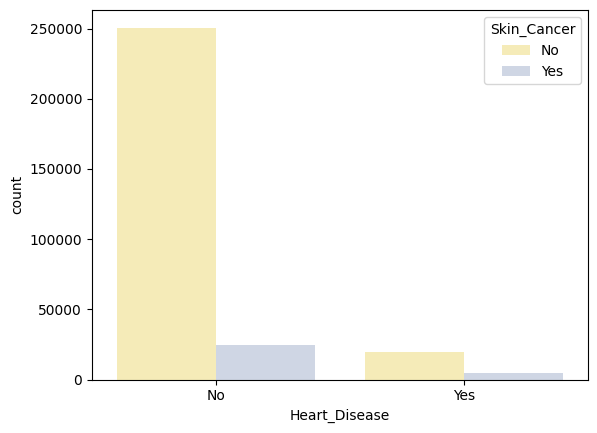

In [17]:
# la répartition des maladies cardiaques en fonction du cancer de la peau
sns.countplot(x =target_column , hue = 'Skin_Cancer', data = dataset , palette = "Pastel2_r")
plt.show()

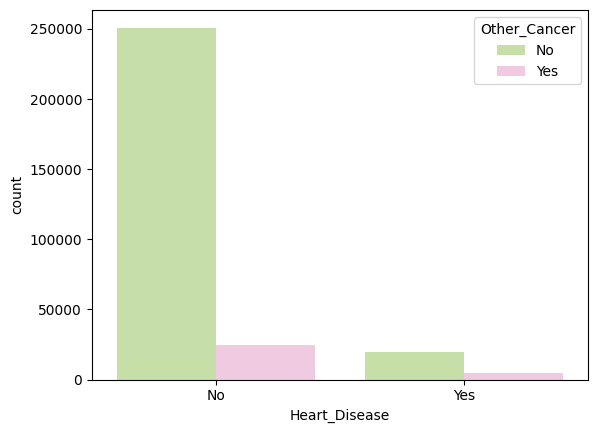

In [18]:
# la répartition des maladies cardiaques en fonction des autres types de cancer
sns.countplot(x =target_column , hue = 'Other_Cancer', data = dataset ,palette = "PiYG_r" )
plt.show()

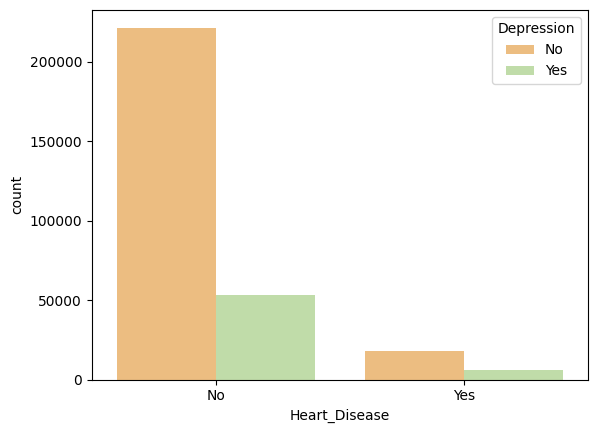

In [19]:
# la répartition des maladies cardiaques en fonction des maladies de dépression
sns.countplot(x =target_column , hue = 'Depression', data = dataset ,palette = "Spectral")
plt.show()

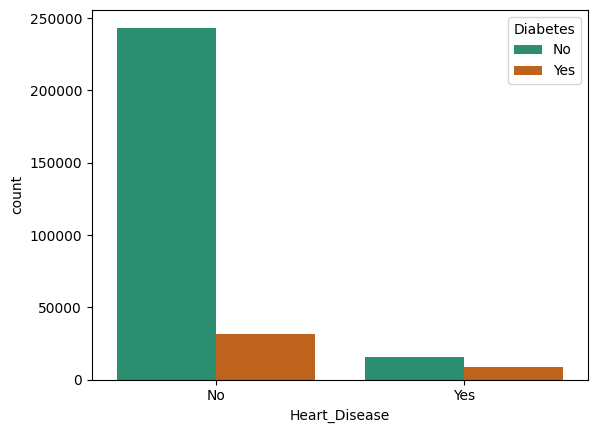

In [20]:
# la répartition des maladies cardiaques en fonction du diabete
sns.countplot(x =target_column , hue = 'Diabetes', data = dataset , palette = "Dark2")
plt.show()

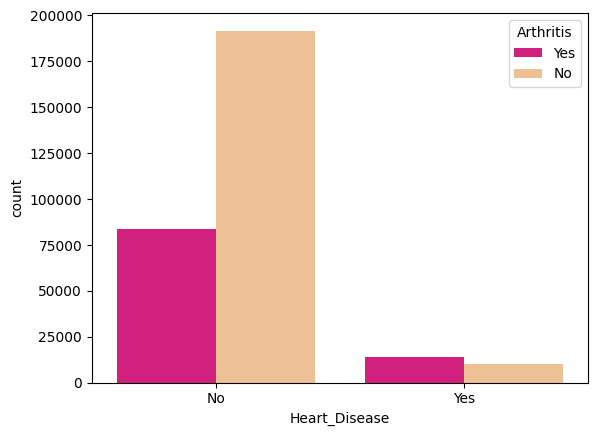

In [21]:
#Distribution des cas d'arthrite selon la présence ou l'absence de maladies cardiaques
sns.countplot(x =target_column , hue = 'Arthritis', data = dataset , palette = "Accent_r")
plt.show()

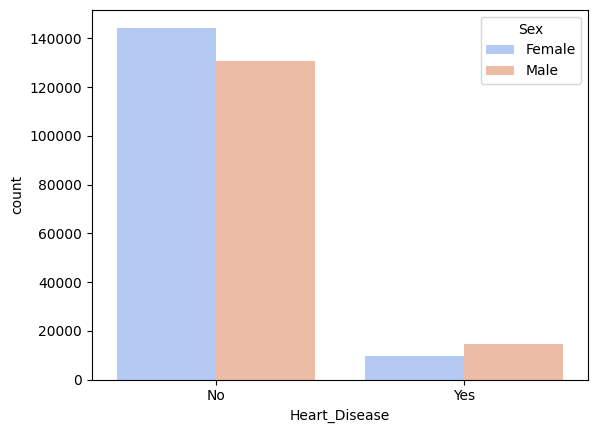

In [22]:
## la répartition des maladies cardiaques selon le sexe
sns.countplot(x =target_column , hue = 'Sex', data = dataset , palette='coolwarm')
plt.show()

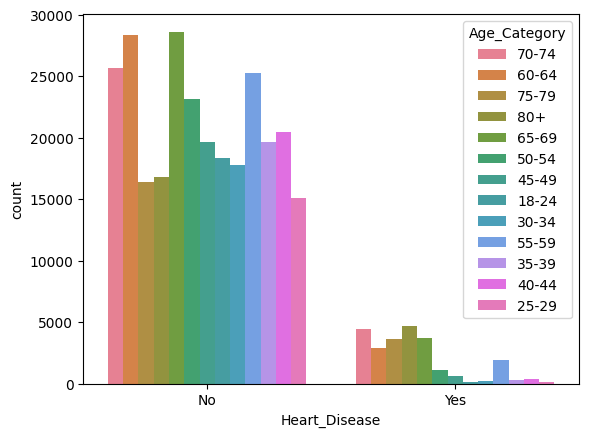

In [23]:
## la répartition des maladies cardiaques selon l'age
sns.countplot(x =target_column , hue = 'Age_Category', data = dataset)
plt.show()

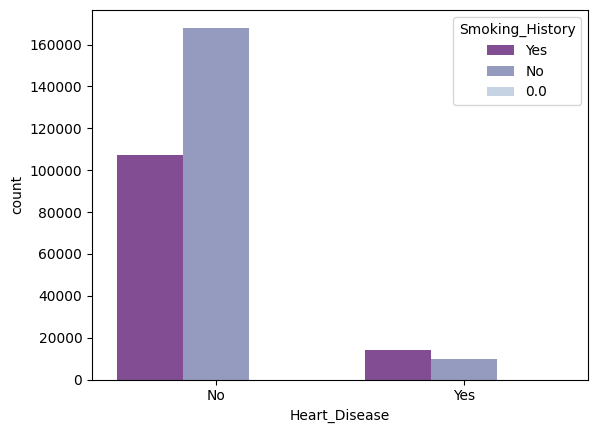

In [24]:
#Répartition des antécédents de tabagisme selon la présence de maladie cardiaque
sns.countplot(x =target_column , hue ='Smoking_History', data = dataset , palette='BuPu_r')
plt.show()

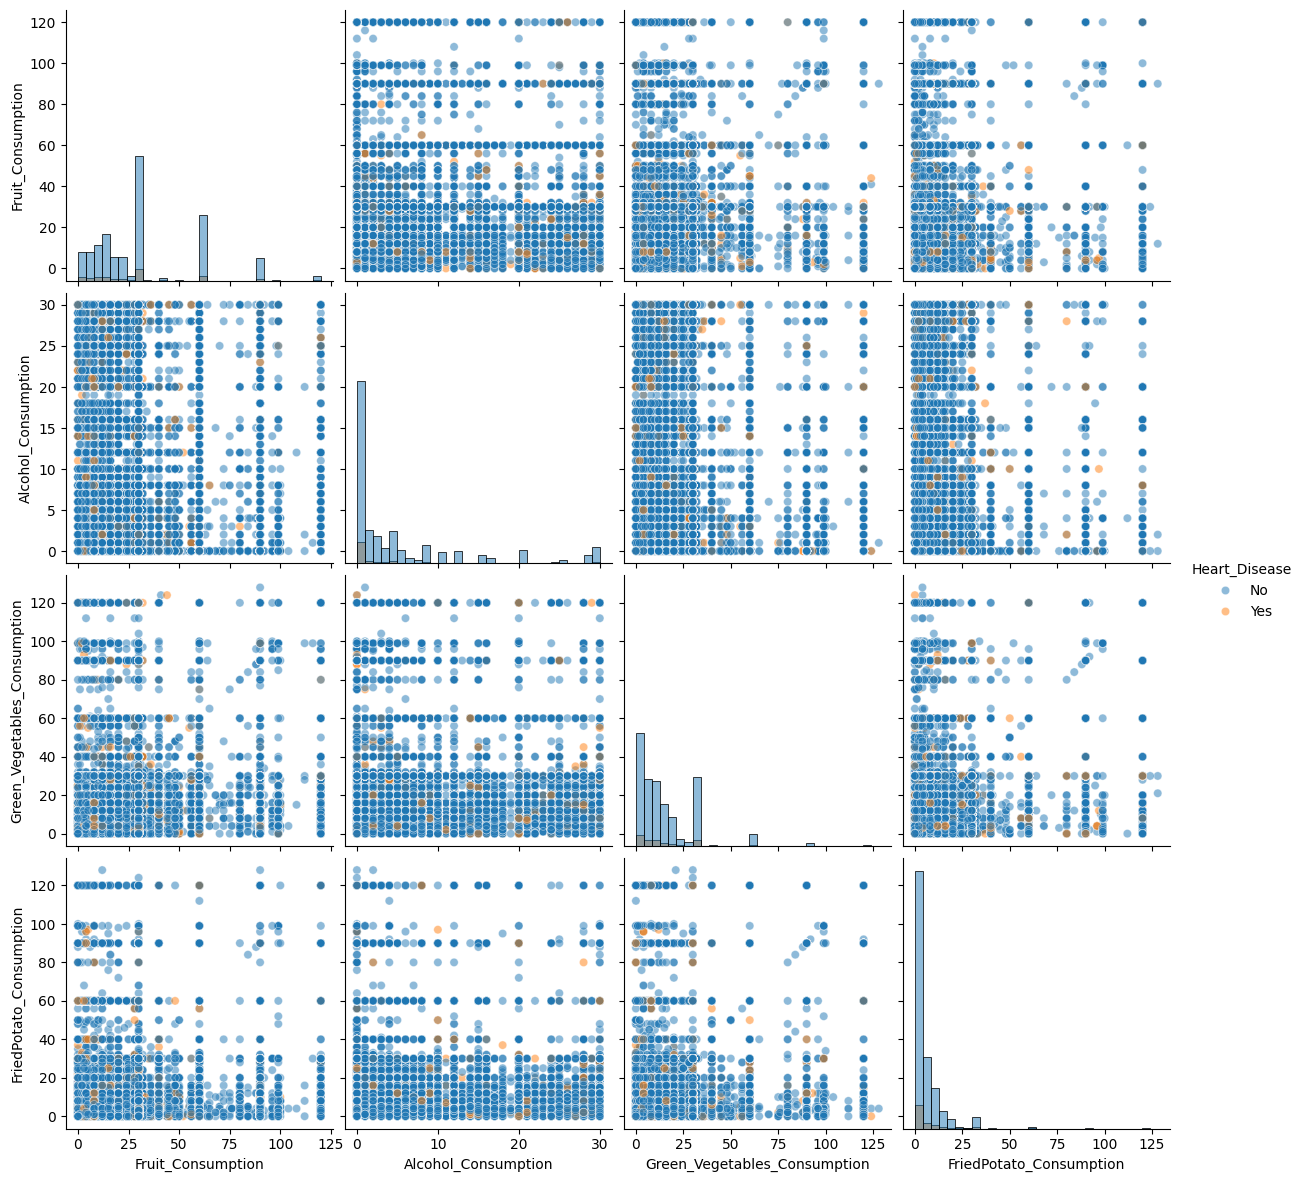

In [25]:
#Visualisatio des corrélations entre les habitudes alimentaires et la maladie cardiaque
columns = ["Fruit_Consumption" , "Alcohol_Consumption" , "Green_Vegetables_Consumption" , "FriedPotato_Consumption" ]
_ = sns.pairplot(
    data=dataset,
    vars=columns,
    hue=target_column,
    plot_kws={"alpha": 0.5},
    height=3,
    diag_kind="hist",
    diag_kws={"bins": 30}
)

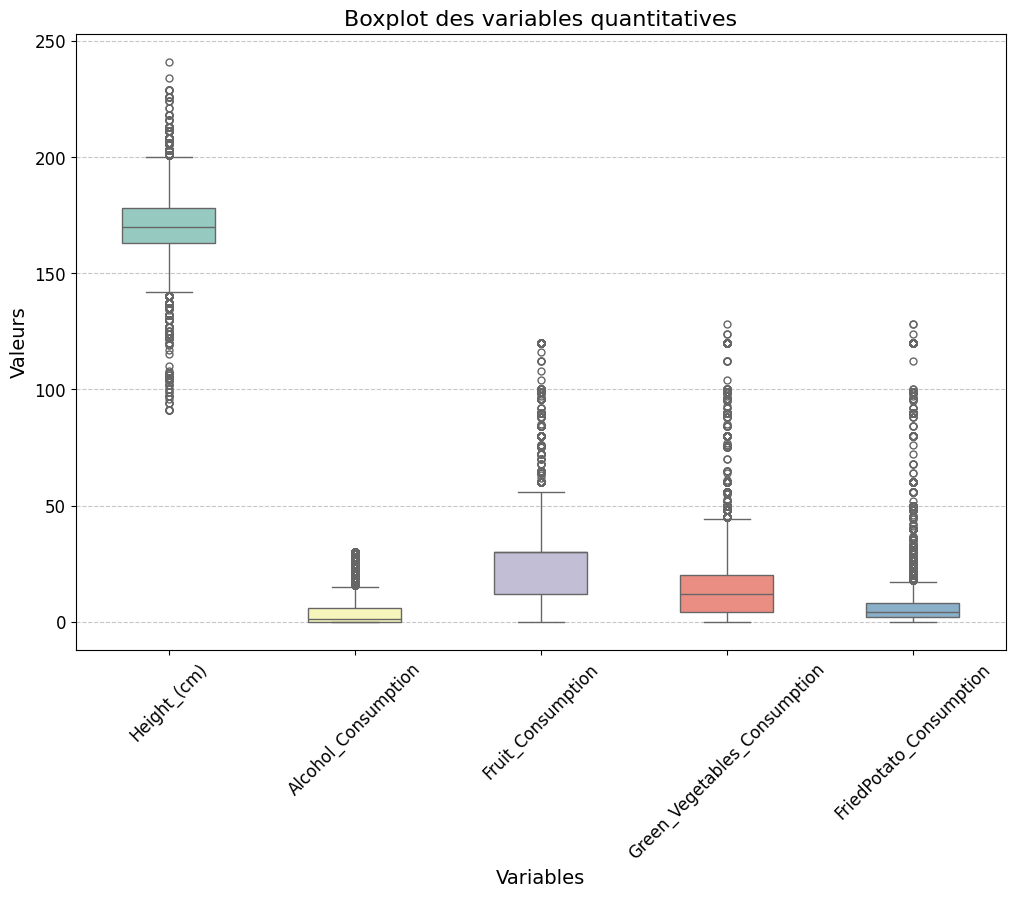

In [26]:
#Boite à moustache:
#dataset.plot(kind='box', figsize=(15,5),x="Heart_Disease", y=["Alcohol_Consumption","Fruit_Consumption","Green_Vegetables_Consumption","FriedPotato_Consumption","Height_(cm)"])
#plt.show()
quantis = dataset.select_dtypes(include=['float64'])
plt.figure(figsize=(12, 8))

# Utilisation de la palette de couleurs de seaborn
sns.set_palette("Set3")

# Utilisation de la fonction boxplot de seaborn
sns.boxplot(data=quantis, orient='v', width=0.5, fliersize=5)

# Rotation des labels sur l'axe des x pour une meilleure lisibilité
plt.xticks(rotation=45, fontsize=12)

plt.title("Boxplot des variables quantitatives", fontsize=16)
plt.ylabel("Valeurs", fontsize=14)
plt.xlabel("Variables", fontsize=14)

# Ajout d'une grille pour une meilleure lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Personnalisation des axes
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

<div class="alert alert-info">
<h3>Interpretation</h3>
<p>
Ce boxplot permet de visualiser la distribution des variables quantitatives présentes dans le dataset. Chaque boîte représente la médiane et les quartiles de la distribution des valeurs pour une variable donnée. La longueur de la boîte indique la dispersion des données, tandis que les moustaches (ligne verticale avec des barres) montrent l'étendue des données, à l'exclusion des valeurs aberrantes qui sont représentées par des points individuels au-delà des moustaches.
</p>
</div>

<Axes: >

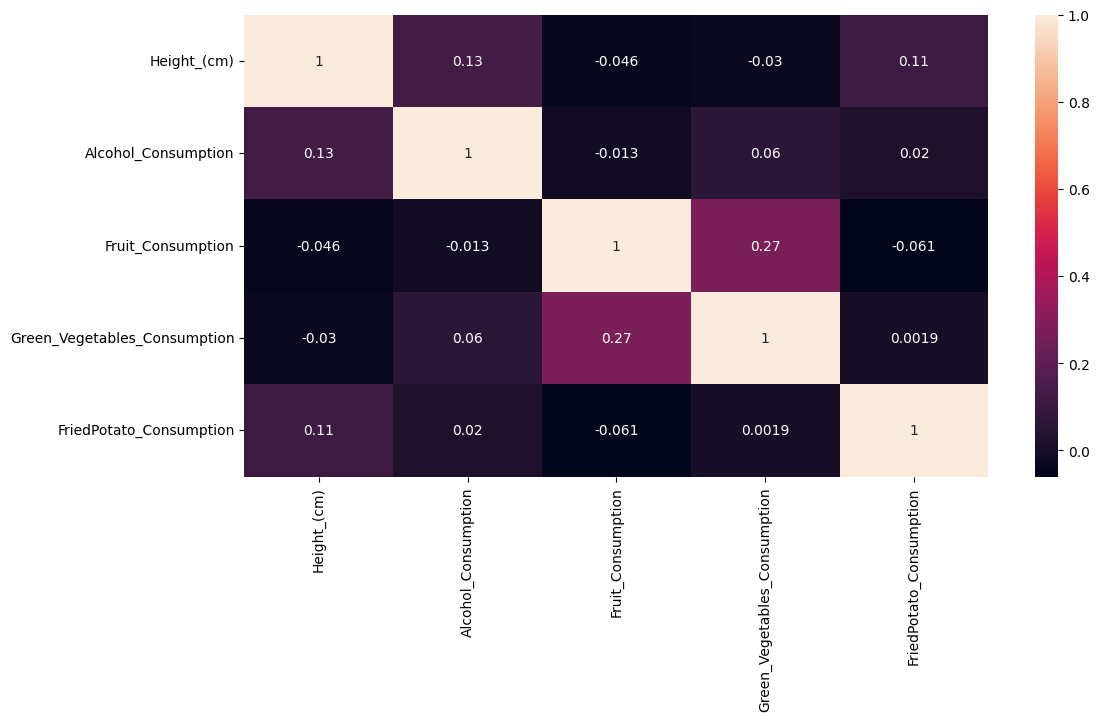

In [27]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,6))
corr=quantis.corr()
sns.heatmap(corr,annot=True)

<div class="alert alert-info">
<h3>Interpretation</h3>
<p>
     Les couleurs de la heatmap indiquent le degré de corrélation : les valeurs proches de 1 sont représentées par des nuances de mauve claires, indiquant une corrélation positive forte où les variables augmentent ensemble, tandis que les valeurs proches de -1 sont représentées par des nuances de mauve plus foncées, indiquant une corrélation négative forte où une variable augmente pendant que l'autre diminue. Les cases noires ou très foncées indiquent une faible corrélation, suggérant que les variables sont indépendantes.
</p>
</div>

### 2. Nettoyage de données

##### Probleme de toute la ligne dans une seule colonne
![problem](./data_prob.png)

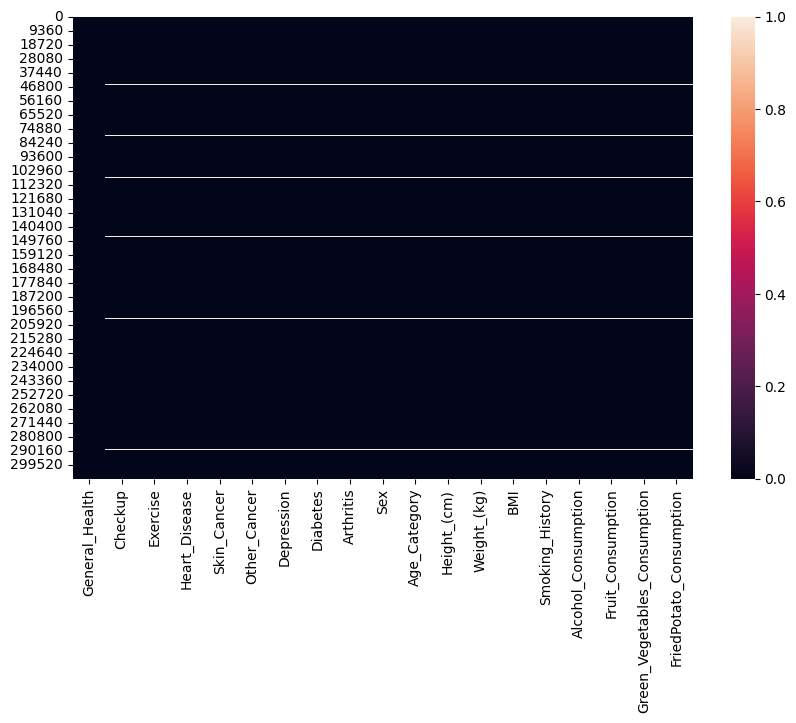

In [4]:
# Visualizing the missing values using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(dataset.isnull())
plt.show()

In [7]:
print(dataset.isnull().sum())

General_Health                     0
Checkup                         9542
Exercise                        9542
Heart_Disease                   9542
Skin_Cancer                     9542
Other_Cancer                    9542
Depression                      9542
Diabetes                        9542
Arthritis                       9542
Sex                             9542
Age_Category                    9542
Height_(cm)                     9567
Weight_(kg)                     9543
BMI                             9542
Smoking_History                 9542
Alcohol_Consumption             9542
Fruit_Consumption               9542
Green_Vegetables_Consumption    9542
FriedPotato_Consumption         9543
dtype: int64


#### solution

In [39]:

data = dataset.copy()

# Filtrer les lignes avec des valeurs multiples dans la colonne 'General_Health'
multi_values_rows = data[data['General_Health'].str.contains(',')]
for index, row in multi_values_rows.iterrows():
    values = row['General_Health'].split(',')
    # Vérifier et combiner les valeurs pour la colonne 'Diabetes'
    if values[7].startswith('"') and values[8].endswith('"'):
        combined_diabetes = values[7].strip('"') + ',' + values[8].strip('"')
        # Déplacer les valeurs suivantes
        values = values[:7] + [combined_diabetes] + values[9:]
    
    # Distribution sur les autres colonnes
    data.at[index, 'General_Health'] = values[0]
    data.at[index, 'Checkup'] = values[1]
    data.at[index, 'Exercise'] = values[2]
    data.at[index, 'Heart_Disease'] = values[3]
    data.at[index, 'Skin_Cancer'] = values[4]
    data.at[index, 'Other_Cancer'] = values[5]
    data.at[index, 'Depression'] = values[6]
    data.at[index, 'Diabetes'] = values[7]
    data.at[index, 'Arthritis'] = values[8]
    data.at[index, 'Sex'] = values[9]
    data.at[index, 'Age_Category'] = values[10]
    
    # Cast to appropriate types
    data.at[index, 'Height_(cm)'] = float(values[11])
    data.at[index, 'Weight_(kg)'] = float(values[12])
    data.at[index, 'BMI'] = float(values[13])
    data.at[index, 'Smoking_History'] = values[14]
    data.at[index, 'Alcohol_Consumption'] = float(values[15])
    data.at[index, 'Fruit_Consumption'] = float(values[16])
    data.at[index, 'Green_Vegetables_Consumption'] = float(values[17])
    data.at[index, 'FriedPotato_Consumption'] = float(values[18])

print(data.dtypes)

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                      object
BMI                              object
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object


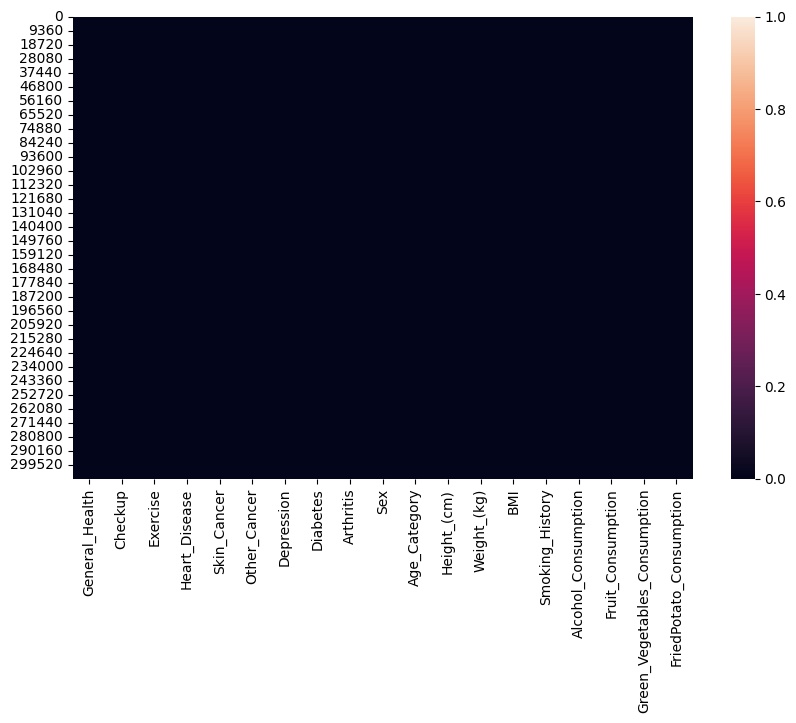

General_Health                   0
Checkup                          0
Exercise                         0
Heart_Disease                    0
Skin_Cancer                      0
Other_Cancer                     0
Depression                       0
Diabetes                         0
Arthritis                        0
Sex                              0
Age_Category                     0
Height_(cm)                     25
Weight_(kg)                      1
BMI                              0
Smoking_History                  0
Alcohol_Consumption              0
Fruit_Consumption                0
Green_Vegetables_Consumption     0
FriedPotato_Consumption          1
dtype: int64


In [9]:
# Visualizing the missing values using heatmap after the processing
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull())
plt.show()

# valeurs null apres:
print(data.isnull().sum())


#### Supression des Doublons

In [40]:
# Afficher le nombre de doublons
print("Nombre de doublons avant suppression: ", data.duplicated().sum())

# Supprimer les doublons
clean = data.drop_duplicates()

# Afficher le nombre de doublons après suppression
print("Nombre de doublons après suppression: ", clean.duplicated().sum())


Nombre de doublons avant suppression:  80
Nombre de doublons après suppression:  0


#### Transformer le poids et le BMI à float

In [41]:
# transform weight and height to numerical values
trans = clean.copy()
trans['Weight_(kg)'] = trans['Weight_(kg)'].replace(' ', np.nan)
trans['BMI'] = trans['BMI'].replace(' ', np.nan)

# Convert columns to numeric, coercing errors to NaN
trans['Weight_(kg)'] = pd.to_numeric(trans['Weight_(kg)'], errors='coerce')
trans['BMI'] = pd.to_numeric(trans['BMI'], errors='coerce')

print(trans.dtypes)
print('\n\n')
print(trans.isnull().sum())

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object



General_Health                   0
Checkup                          0
Exercise                         0
Heart_Disease                    0
Skin_Cancer                      0
Other_Cancer                     0
Depression   

#### Traitement des Valeurs manquantes

In [42]:
#Recalculate the height(m) and the weight(kg)
# Convert height from cm to meters
trans['Height_(m)'] = trans['Height_(cm)'] / 100

# Recalculate missing height (cm) from weight and BMI
trans.loc[trans['Height_(cm)'].isna(), 'Height_(cm)'] = np.sqrt(
    trans['Weight_(kg)'] / trans['BMI']
) * 100

trans.loc[trans['Height_(m)'].isna(), 'Height_(m)'] = np.sqrt(
    trans['Weight_(kg)'] / trans['BMI']
)

# Recalculate missing weight (kg) from height and BMI
trans.loc[trans['Weight_(kg)'].isna(), 'Weight_(kg)'] = (
    trans['BMI'] * (trans['Height_(m)'] ** 2)
)

trans = trans.drop(columns=['Height_(m)'])
print(trans.isnull().sum())


General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     1
BMI                             1
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         1
dtype: int64


In [43]:
#suppression des 3 lignes restants
print("\nNombre de valeurs manquantes avant traitement: ")
print(trans.isnull().sum())
#Delete the rows with missing values
no_null = trans.dropna()
# Afficher le nombre de valeurs manquantes après traitement
print("\nNombre de valeurs manquantes après traitement: ")
print(no_null.isnull().sum())


Nombre de valeurs manquantes avant traitement: 
General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     1
BMI                             1
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         1
dtype: int64

Nombre de valeurs manquantes après traitement: 
General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabe

In [14]:
no_null.shape

(308773, 19)

#### Valeurs aberrantes

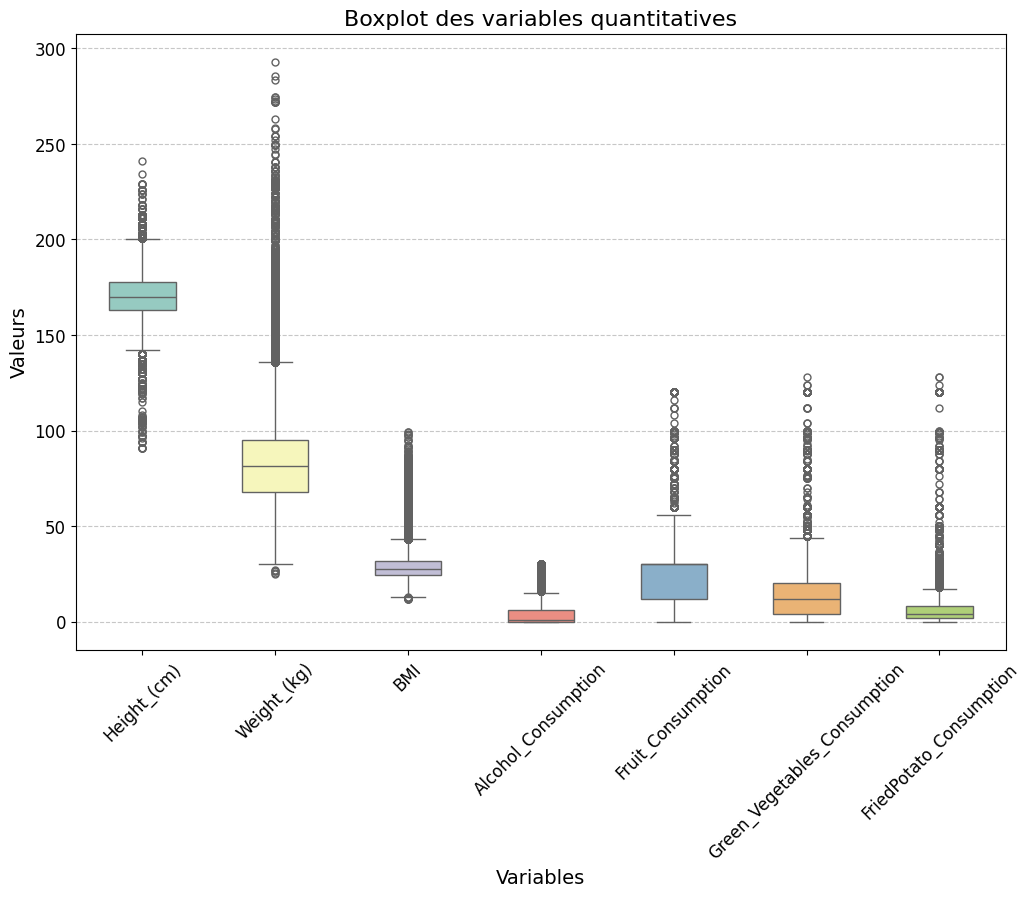

In [44]:
plt.figure(figsize=(12, 8))

# Utilisation de la palette de couleurs de seaborn
sns.set_palette("Set3")
draft=no_null.copy()

# Utilisation de la fonction boxplot de seaborn
sns.boxplot(data=draft, orient='v', width=0.5, fliersize=5)

# Rotation des labels sur l'axe des x pour une meilleure lisibilité
plt.xticks(rotation=45, fontsize=12)

plt.title("Boxplot des variables quantitatives", fontsize=16)
plt.ylabel("Valeurs", fontsize=14)
plt.xlabel("Variables", fontsize=14)

# Ajout d'une grille pour une meilleure lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Personnalisation des axes
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

In [45]:
#traitement des valeurs aberrantes:
#Height_(cm)
q1=draft["Height_(cm)"].quantile(q=0.25)
q3=draft["Height_(cm)"].quantile(q=0.75)
IQR=q3-q1
borne_inf = q1-1.5*IQR
borne_sup = q3 +1.5*IQR
draft= draft[draft["Height_(cm)"]<borne_sup]
draft=draft[draft["Height_(cm)"]>borne_inf]

In [46]:
#Weight_(kg)
q1=draft["Weight_(kg)"].quantile(q=0.25)
q3=draft["Weight_(kg)"].quantile(q=0.75)
IQR=q3-q1
borne_inf = q1-1.5*IQR
borne_sup = q3 +1.5*IQR
draft= draft[draft["Weight_(kg)"]<borne_sup]
draft=draft[draft["Weight_(kg)"]>borne_inf]

In [47]:
#BMI
q1=draft["BMI"].quantile(q=0.25)
q3=draft["BMI"].quantile(q=0.75)
IQR=q3-q1
borne_inf = q1-1.5*IQR
borne_sup = q3 +1.5*IQR
draft= draft[draft["BMI"]<borne_sup]
draft=draft[draft["BMI"]>borne_inf]

In [48]:
#Alcohol_Consumption
q1=draft["Alcohol_Consumption"].quantile(q=0.25)
q3=draft["Alcohol_Consumption"].quantile(q=0.75)
IQR=q3-q1
borne_inf = q1-1.5*IQR
borne_sup = q3 +1.5*IQR
draft= draft[draft["Alcohol_Consumption"]<borne_sup]
draft=draft[draft["Alcohol_Consumption"]>borne_inf]

In [49]:
#Fruit_Consumption
q1=draft["Fruit_Consumption"].quantile(q=0.25)
q3=draft["Fruit_Consumption"].quantile(q=0.75)
IQR=q3-q1
borne_inf = q1-1.5*IQR
borne_sup = q3 +1.5*IQR
draft= draft[draft["Fruit_Consumption"]<borne_sup]
draft=draft[draft["Fruit_Consumption"]>borne_inf]

In [50]:
#Green_Vegetables_Consumption
q1=draft["Green_Vegetables_Consumption"].quantile(q=0.25)
q3=draft["Green_Vegetables_Consumption"].quantile(q=0.75)
IQR=q3-q1
borne_inf = q1-1.5*IQR
borne_sup = q3 +1.5*IQR
draft= draft[draft["Green_Vegetables_Consumption"]<borne_sup]
draft=draft[draft["Green_Vegetables_Consumption"]>borne_inf]

In [51]:
#FriedPotato_Consumption
q1=draft["FriedPotato_Consumption"].quantile(q=0.25)
q3=draft["FriedPotato_Consumption"].quantile(q=0.75)
IQR=q3-q1
borne_inf = q1-1.5*IQR
borne_sup = q3 +1.5*IQR
draft= draft[draft["FriedPotato_Consumption"]<borne_sup]
draft=draft[draft["FriedPotato_Consumption"]>borne_inf]

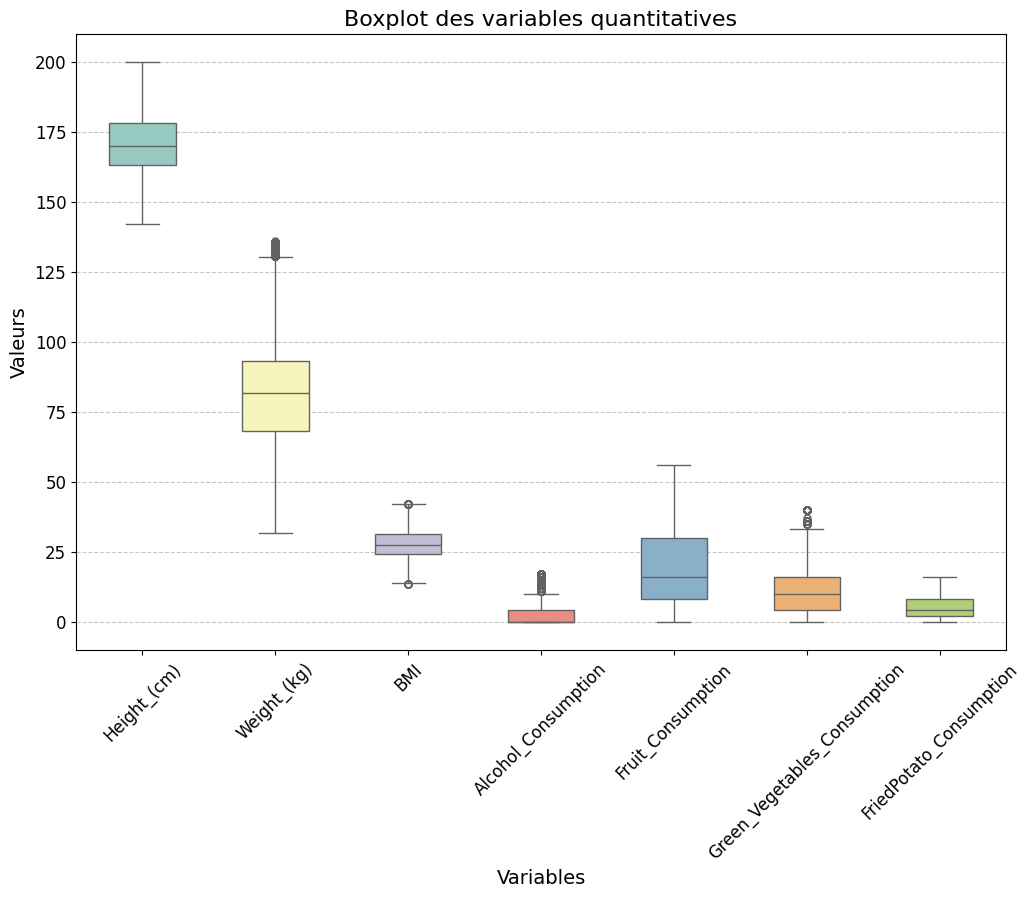

In [52]:
plt.figure(figsize=(12, 8))

# Utilisation de la palette de couleurs de seaborn
sns.set_palette("Set3")
# Utilisation de la fonction boxplot de seaborn
sns.boxplot(data=draft, orient='v', width=0.5, fliersize=5)

# Rotation des labels sur l'axe des x pour une meilleure lisibilité
plt.xticks(rotation=45, fontsize=12)

plt.title("Boxplot des variables quantitatives", fontsize=16)
plt.ylabel("Valeurs", fontsize=14)
plt.xlabel("Variables", fontsize=14)

# Ajout d'une grille pour une meilleure lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Personnalisation des axes
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

In [53]:
draft.shape

(185699, 19)

#### convert categorical data

In [54]:
#les valeurs distinctes de chaque colonne de type object
df = draft.copy()
columns_object = df.select_dtypes(include=['object']).columns
for column in columns_object:
    print(column, df[column].unique())
df.select_dtypes('object').nunique()

General_Health ['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']
Checkup ['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']
Exercise ['No' 'Yes']
Heart_Disease ['No' 'Yes']
Skin_Cancer ['No' 'Yes']
Other_Cancer ['No' 'Yes']
Depression ['No' 'Yes']
Diabetes ['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy']
Arthritis ['Yes' 'No']
Sex ['Female' 'Male']
Age_Category ['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '30-34' '55-59'
 '18-24' '35-39' '40-44' '25-29']
Smoking_History ['Yes' 'No']


General_Health      5
Checkup             5
Exercise            2
Heart_Disease       2
Skin_Cancer         2
Other_Cancer        2
Depression          2
Diabetes            4
Arthritis           2
Sex                 2
Age_Category       13
Smoking_History     2
dtype: int64

In [55]:
#la transformation
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in columns_object:
    df[column]=le.fit_transform(df[column])

In [22]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,0,0,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,4,0,1,0,0,0,2,0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,4,1,0,0,0,0,2,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,3,4,1,1,0,0,0,2,0,1,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,4,0,0,0,0,0,0,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185699 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                185699 non-null  int32  
 1   Checkup                       185699 non-null  int32  
 2   Exercise                      185699 non-null  int32  
 3   Heart_Disease                 185699 non-null  int32  
 4   Skin_Cancer                   185699 non-null  int32  
 5   Other_Cancer                  185699 non-null  int32  
 6   Depression                    185699 non-null  int32  
 7   Diabetes                      185699 non-null  int32  
 8   Arthritis                     185699 non-null  int32  
 9   Sex                           185699 non-null  int32  
 10  Age_Category                  185699 non-null  int32  
 11  Height_(cm)                   185699 non-null  float64
 12  Weight_(kg)                   185699 non-null  fl

#### A look at the data again

<Axes: xlabel='Heart_Disease'>

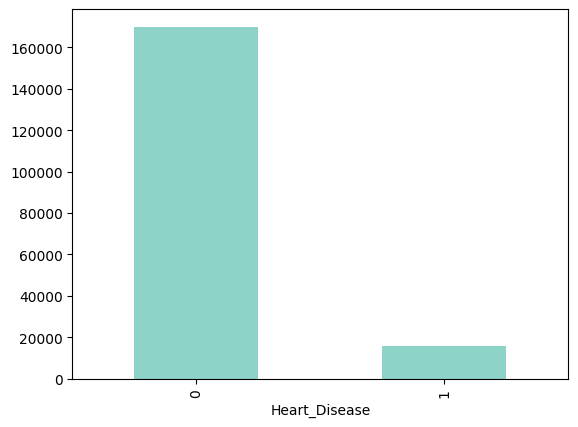

In [29]:
df['Heart_Disease'].value_counts().plot(kind='bar')

In [30]:
df['Heart_Disease'].value_counts()

Heart_Disease
0    169964
1     15735
Name: count, dtype: int64

<Axes: >

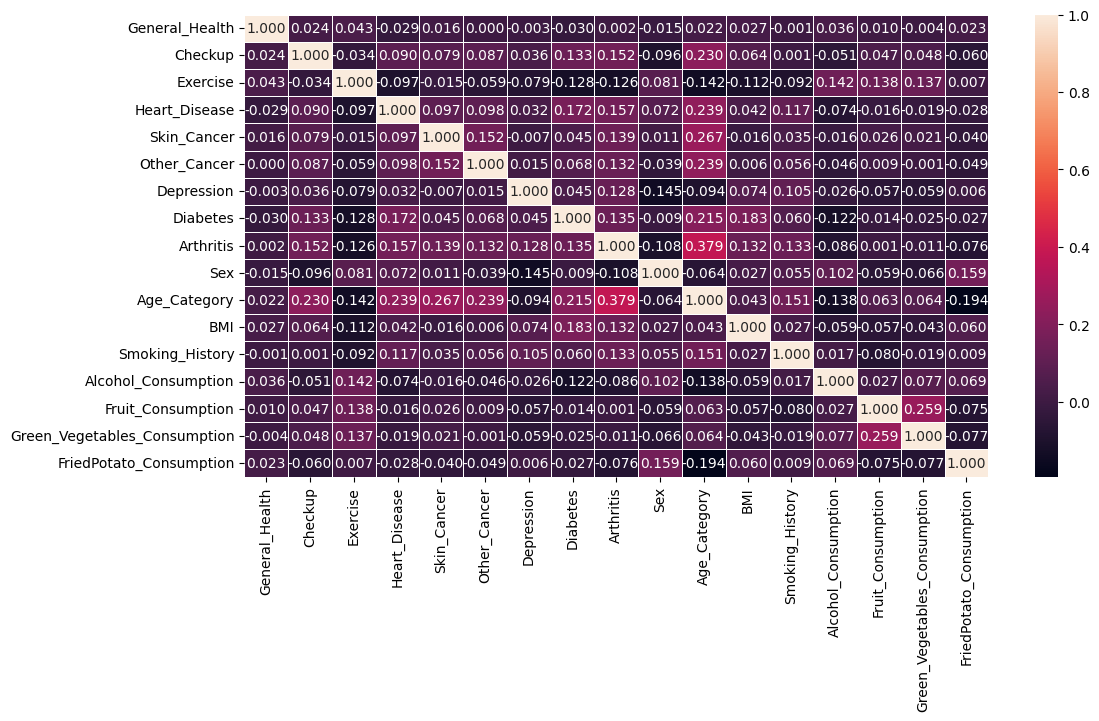

In [58]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,6))
corr=df.corr()
sns.heatmap(corr,annot=True, fmt=".3f" , linewidths = .5)
#sns.heatmap(corr,annot=True)

<div class="alert alert-success">
<p>
    weight(kg) et BMI sont  corrélé de 0.83
</p>
<p>BMI (Body Mass Index) = weight (kg) / (height (m) * height (m))</p>
</div>

In [32]:
#Show the correlation of the target with the other features
corr_target = abs(corr['Heart_Disease'])
corr_target = corr_target.sort_values(ascending=False)
print(corr_target)


Heart_Disease                   1.000000
Age_Category                    0.239313
Diabetes                        0.171709
Arthritis                       0.157421
Smoking_History                 0.116519
Other_Cancer                    0.097548
Skin_Cancer                     0.097497
Exercise                        0.097425
Checkup                         0.090031
Alcohol_Consumption             0.074383
Sex                             0.071992
Weight_(kg)                     0.045725
BMI                             0.041969
Depression                      0.032015
General_Health                  0.028638
FriedPotato_Consumption         0.027794
Green_Vegetables_Consumption    0.019316
Height_(cm)                     0.017475
Fruit_Consumption               0.015554
Name: Heart_Disease, dtype: float64


#### Drop unnecessary columns

In [56]:
#elimination de height et weight
df = df.drop(['Weight_(kg)', 'Height_(cm)'], axis=1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185699 entries, 0 to 308853
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                185699 non-null  int32  
 1   Checkup                       185699 non-null  int32  
 2   Exercise                      185699 non-null  int32  
 3   Heart_Disease                 185699 non-null  int32  
 4   Skin_Cancer                   185699 non-null  int32  
 5   Other_Cancer                  185699 non-null  int32  
 6   Depression                    185699 non-null  int32  
 7   Diabetes                      185699 non-null  int32  
 8   Arthritis                     185699 non-null  int32  
 9   Sex                           185699 non-null  int32  
 10  Age_Category                  185699 non-null  int32  
 11  BMI                           185699 non-null  float64
 12  Smoking_History               185699 non-null  in

### Balance the data

In [57]:
df_0 = df[df['Heart_Disease'] == 0]
df_1 = df[df['Heart_Disease'] == 1]
#Select randomly the same number of samples from the 0 class
df_0 = df_0.sample(n=len(df_1), random_state=42)
#Concatenate the two classes
df_balanced = pd.concat([df_0, df_1])
df_balanced['Heart_Disease'].value_counts()

Heart_Disease
0    15735
1    15735
Name: count, dtype: int64

# Split the dataset

In [58]:
from sklearn.model_selection import train_test_split
X = df_balanced.drop('Heart_Disease', axis=1)
y = df_balanced['Heart_Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# K-Nearest Neighbors (KNN)

Best parameters:  {'metric': 'manhattan', 'n_neighbors': 9}
Best score:  0.7082024599786745
              precision    recall  f1-score   support

           0       0.74      0.66      0.70      3967
           1       0.69      0.76      0.72      3901

    accuracy                           0.71      7868
   macro avg       0.71      0.71      0.71      7868
weighted avg       0.71      0.71      0.71      7868



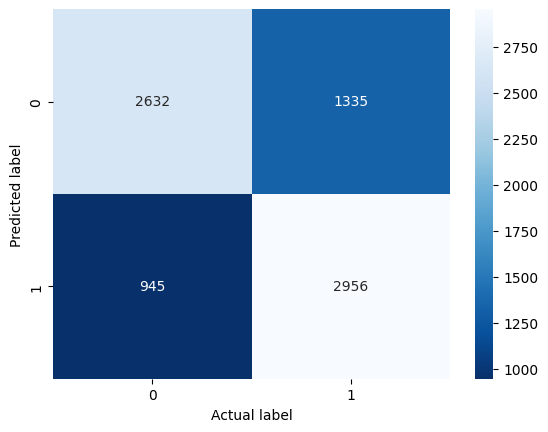

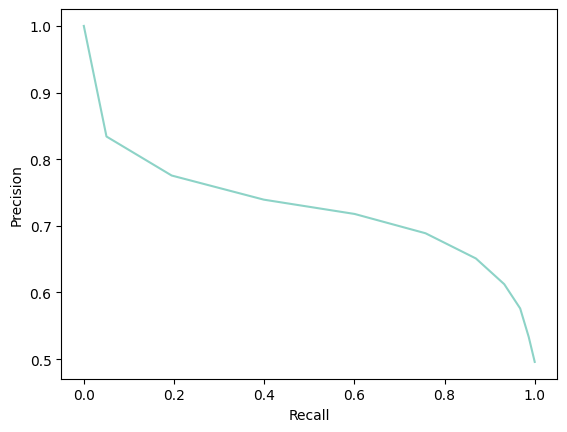

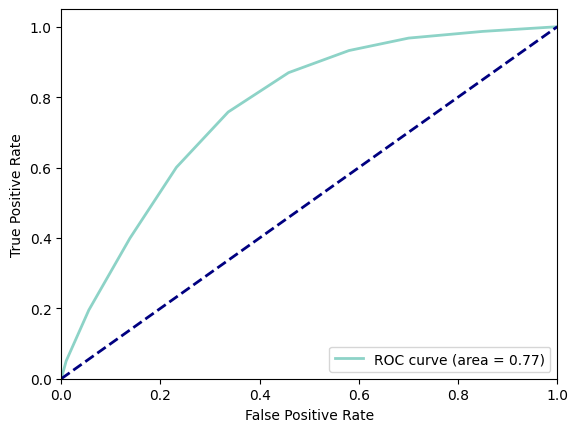

In [59]:
knn = KNeighborsClassifier()
knn_parameter = {'n_neighbors': [1,3,5,7,9], 'metric': ['euclidean', 'manhattan']}

grid_search = GridSearchCV(knn, knn_parameter, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
knn_best_est =grid_search.best_estimator_

y_predicted = knn_best_est.predict(X_test)
print(classification_report(y_test, y_predicted))
cm = confusion_matrix(y_test, y_predicted)
#sns.heatmap(cm, annot=True, fmt='d')
sns.heatmap(cm, annot=True , fmt='d' ,cmap="Blues_r")
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.show()

y_scores = knn_best_est.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores)
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr , tpr)

plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Decision Tree

Best parameters:  {'criterion': 'entropy'}
Best score:  0.670027671169926
              precision    recall  f1-score   support

           0       0.66      0.67      0.66      3967
           1       0.66      0.65      0.65      3901

    accuracy                           0.66      7868
   macro avg       0.66      0.66      0.66      7868
weighted avg       0.66      0.66      0.66      7868



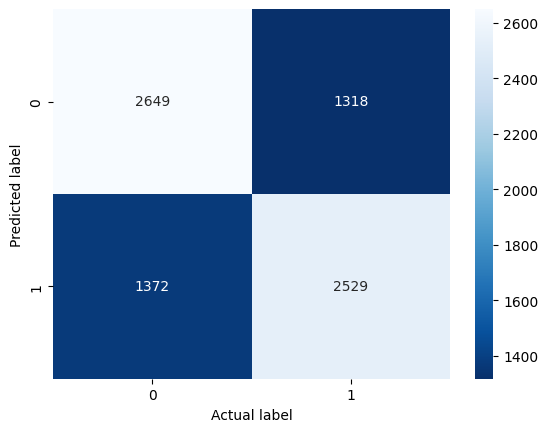

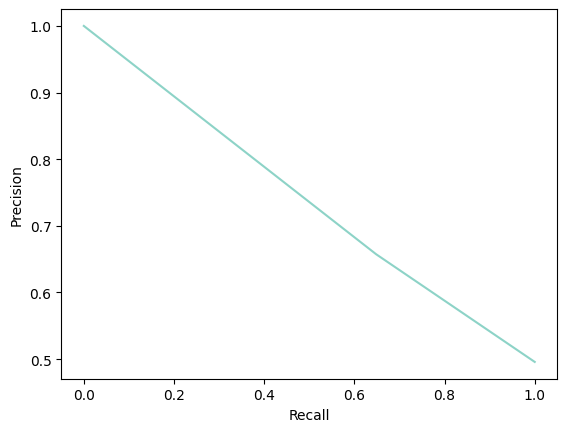

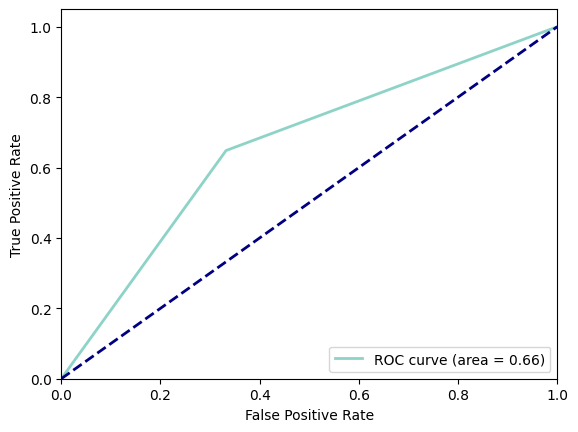

In [60]:
dt = DecisionTreeClassifier()
decision_tree_parameter = {'criterion': ['entropy', 'gini']}

grid_search = GridSearchCV(dt, decision_tree_parameter, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
dt_best_est =grid_search.best_estimator_

y_predicted = dt_best_est.predict(X_test)
print(classification_report(y_test, y_predicted))
cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm, annot=True , fmt='d' ,cmap="Blues_r")
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.show()

y_scores = dt_best_est.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores)
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr , tpr)

plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


# Logistic Regression

              precision    recall  f1-score   support

           0       0.77      0.69      0.73      3967
           1       0.72      0.79      0.75      3901

    accuracy                           0.74      7868
   macro avg       0.74      0.74      0.74      7868
weighted avg       0.74      0.74      0.74      7868



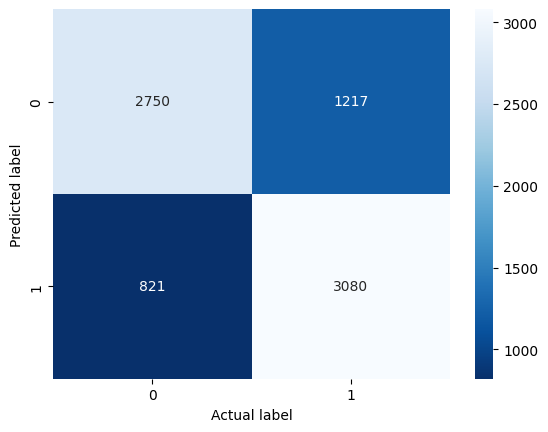

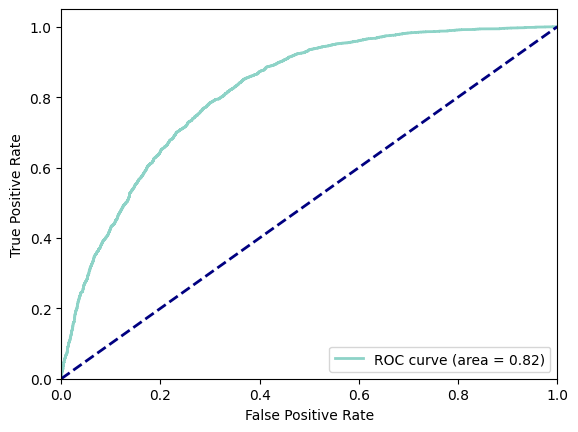

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Normaliser les données: Les données d'entraînement (X_train) et de test (X_test) sont normalisées à l'aide de StandardScaler 
# pour garantir que chaque caractéristique ait une moyenne de 0 et un écart-type de 1.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Augmenter max_iter et changer solver dans la régression logistique
logistic_regression = LogisticRegression(max_iter=1000, solver='liblinear')
#lr_parameter : C'est un dictionnaire qui spécifie les valeurs des hyperparamètres à tester
lr_parameter = {'max_iter': [1000, 2000, 3000], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}


# Réglage des hyperparamètres avec GridSearchCV
#GridSearchCV est utilisé pour effectuer une recherche en grille afin de trouver les meilleurs hyperparamètres parmi ceux spécifiés dans lr_param_grid
grid_search = GridSearchCV(logistic_regression, lr_parameter, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Meilleur modèle
lr_best_est = grid_search.best_estimator_

# Évaluation du modèle
y_predicted = lr_best_est.predict(X_test_scaled)
print(classification_report(y_test, y_predicted))

#confusion matrix
cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm, annot=True , fmt='d' ,cmap="Blues_r")
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.show()

# Tracer les courbes ROC
y_prob = lr_best_est.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# SVM

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# le classifieur SVM est instancié avec les hyperparamètres par défaut
svc = SVC()

# Entraînement du classifieur sur le jeu de données d'entraînement
svc.fit(X_train_scaled, y_train)

# Prédictions sur le jeu de données de test
y_predicted = svc.predict(X_test_scaled)

# Calcul et affichage de l'exactitude du modèle
print('Model accuracy score with default hyperparameters: {0:0.4f}'.format(accuracy_score(y_test, y_predicted)))


Model accuracy score with default hyperparameters: 0.7495


### TEMP NB: Le classifieur SVM est instancié avec les hyperparamètres par défaut.

In [92]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# import SVC classifier
from sklearn.svm import SVC
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score
# le classifieur SVM est instancié avec un noyau rbf et un paramètre de régularisation C fixé à 0.1. 
svc=SVC(kernel='rbf', C=0.1)
#timer start
import time
start = time.time()
# fit classifier to training set
svc.fit(X_train_scaled,y_train)
# make predictions on test set
y_predicted=svc.predict(X_test_scaled)
#timer end
end = time.time()
# compute and print accuracy score
print('Model accuracy score with Kernel rbf and C=0.1: {0:0.4f}'. format(accuracy_score(y_test, y_predicted)))
print('Execution time: {0:0.1f} seconds '.format(end - start))

Model accuracy score with Kernel rbf and C=0.1: 0.7489
Execution time: 30.9 seconds 


### TEMP NB : Le classifieur SVM est instancié avec un noyau rbf et un paramètre de régularisation C fixé à 0.1.

In [93]:
import gc
del svc 
kernels = ['rbf', 'sigmoid','linear', 'poly']
Cs = [100, 10, 1.0, 0.1, 0.001]

best_kernel = ''
best_C = 0
highest_accuracy = 0

for kernel in kernels:
    for C in Cs:
        print("Kernel: ", kernel, "C: ", C)
        svm = SVC(kernel=kernel, C=C)
        svm.fit(X_train_scaled, y_train)
        y_predicted = svm.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_predicted)
        print("  Accuracy: ", accuracy)
        if accuracy > highest_accuracy:
            best_kernel = kernel
            best_C = C
            highest_accuracy = accuracy
        print("------------------------------------------------------------\n ")
        # Delete the model and free up memory
        del svm
        gc.collect()

print("Best kernel: ", best_kernel)
print("Best C: ", best_C)
print("Highest accuracy: ", highest_accuracy)

Kernel:  rbf C:  100
  Accuracy:  0.7178444331469243
------------------------------------------------------------
 
Kernel:  rbf C:  10
  Accuracy:  0.7430096593797662
------------------------------------------------------------
 
Kernel:  rbf C:  1.0
  Accuracy:  0.7494916115912558
------------------------------------------------------------
 
Kernel:  rbf C:  0.1
  Accuracy:  0.7488561260803254
------------------------------------------------------------
 
Kernel:  rbf C:  0.001
  Accuracy:  0.7231825114387392
------------------------------------------------------------
 
Kernel:  sigmoid C:  100
  Accuracy:  0.6616675139806812
------------------------------------------------------------
 
Kernel:  sigmoid C:  10
  Accuracy:  0.6617946110828673
------------------------------------------------------------
 
Kernel:  sigmoid C:  1.0
  Accuracy:  0.6642094560244026
------------------------------------------------------------
 
Kernel:  sigmoid C:  0.1
  Accuracy:  0.6879766141331978
---

### TMP NB: Ce code explore plusieurs combinaisons de noyaux et de valeurs de C pour trouver les meilleurs paramètres pour le modèle SVM.